# ASSIGNMENT #5 - UPPER AIR DATA #
Due: 08 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to first collect data from an online archive using a user-created function.  The data is then plotted on a map to continue to familiarize with plotting weather data on maps.  

Overview:\
In this assignment you will read in rawinsonde observations in a function and plot that data.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [ ]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Sam Halvorson"
__contact__   = "samuel.t.halvorson@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [1]:
import numpy as np
from datetime import datetime

from assignment_5_functions import get_raobs, select_press

import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import StationPlot
from metpy.interpolate import interpolate_to_grid, remove_nan_observations

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### DOWNLOAD OBSERVATIONS FROM  FILE ###
RAwinsonde OBservations (RAOBs) are available from the Iowa State Environmental Mesonet (IEM) archive.  This data can be accessed using the siphon module.  All this will be done within the assignment_5_functions file.  Note, RAOBs don't specify latitude/longitude so we need to add it using a metpy function -> *add_station_lat_lon(data)*.

In [2]:
#grab data from 00Z on 26 December 2023
dt = datetime(2023, 12, 26, 0)
#print(dt)

data = get_raobs(dt)
print(data)



       pressure   height  temperature  dewpoint  direction  speed station  \
0         979.0    386.0         -4.7      -5.4       15.0    2.0    CWPL   
1         968.0    476.0         -4.3      -7.2        NaN    NaN    CWPL   
2         952.0    606.0         -5.5      -7.6        NaN    NaN    CWPL   
3         951.6    609.0          NaN       NaN      355.0    5.0    CWPL   
4         947.0    647.0         -5.5      -8.8        NaN    NaN    CWPL   
...         ...      ...          ...       ...        ...    ...     ...   
14695       5.9  34574.0        -45.3     -84.3        NaN    NaN    KYXY   
14696       5.7  34747.0          NaN       NaN      145.0   15.0    KYXY   
14697       5.4  35159.0        -48.7     -86.7        NaN    NaN    KYXY   
14698       4.7  36076.0        -45.1     -85.1        NaN    NaN    KYXY   
14699       4.0  37145.0        -47.3     -86.3        NaN    NaN    KYXY   

            time    u_wind     v_wind  latitude  longitude  
0     2023-12-

### SUBSET TO 500MB OBS ###
We'll also do this within a function in the assignment_5_functions file.

In [3]:
data500 = select_press(data, 500)
print(data500)

       pressure  height  temperature  dewpoint  direction  speed station  \
35        500.0  5630.0        -20.1     -52.1      280.0   16.0    CWPL   
177       500.0  5700.0        -20.1     -49.1      110.0    1.0    CWQI   
307       500.0  5620.0        -16.5     -24.5      325.0   25.0    CWSE   
451       500.0  5360.0        -20.9     -55.9      265.0  121.0    CYAH   
574       500.0  5340.0        -27.3     -30.8      315.0   49.0    CYBK   
...         ...     ...          ...       ...        ...    ...     ...   
14105     500.0  5850.0         -5.9     -11.9      250.0   27.0    KVER   
14169     500.0  5730.0        -16.3     -45.3      315.0   35.0    KWAL   
14291     500.0  5150.0        -26.1     -27.9      150.0   37.0    KYAK   
14451     500.0  5710.0        -15.5     -34.5      275.0   24.0    KYMW   
14573     500.0  5230.0        -24.7     -25.4      190.0   43.0    KYXY   

            time      u_wind     v_wind  latitude  longitude  
35    2023-12-26   15.75

### PLOT DATA MAP ###
Use the same map of CONUS as we did for the beginning of surface obs.<br>
No need to thin obs as there aren't a ton of RAOBs.

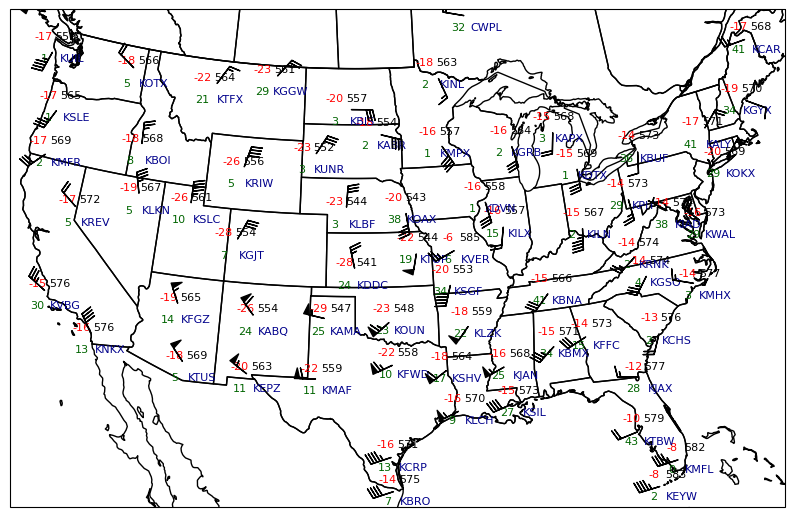

In [12]:
#map projection
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create figure
fig = plt.figure(figsize=(10,10),dpi=100)
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

#zoom on the Northern Plains
ax.set_extent((-120, -75, 23, 50))


#create stationplot (will actually need to create 2 to handle wind gusts)
stationplots = StationPlot(ax, data500.longitude, data500.latitude, transform=ccrs.PlateCarree(), clip_on=True, fontsize=8)

#temperature in red
stationplots.plot_parameter((-1,1), data500['temperature'].values, color='red')

#dewpoint in dark green
stationplots.plot_parameter((-1,-1), (data500["temperature"] - data500['dewpoint'].values), color='darkgreen')

#height (need to format to be the final 3 digits)
stationplots.plot_parameter((1,1), (data500['height'].values), formatter=lambda v: format(10 * v, '.0f')[:3])

#station ID in dark blue
stationplots.plot_text((1.5,-1), data500['station'].values, color='darkblue')

#wind in black
stationplots.plot_barb(data500['u_wind'].values, data500['v_wind'].values, zorder=5)


#save the map as surface_obs.png
plt.savefig("upper_air_500.png")

### CREATE 500mb HEIGHT CONTOURS (ISOHYPSES) ###

In [ ]:
#convert the data to x, y, and z locations on the projected map

#remove nans

#interpolate the data to a grid


### PLOT UPPER AIR STATION PLOTS & CONTOURS ###

In [ ]:

#temperature in red

#dewpoint DEPRESSION in dark green

#height (need to format to be the first 3 digits)

#station ID in dark blue

#wind in black


#plot contours from 4600m to 6000m with 60m interval

#add a title with the date


#save the map as contour_500.png
